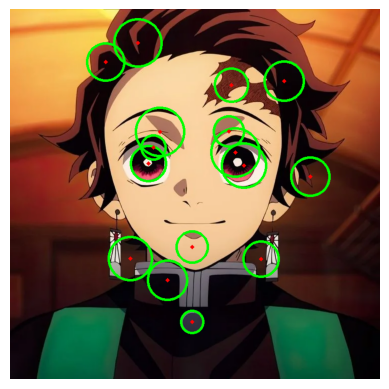

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image (replace with the path to your image)
image = cv2.imread(r"C:\\Users\\Shivam 007\\Downloads\\tanjiro.webp", cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve detection accuracy
blurred_image = cv2.GaussianBlur(gray_image, (9, 9), 2)

# Detect circles in the image using HoughCircles
circles = cv2.HoughCircles(blurred_image, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                           param1=50, param2=30, minRadius=15, maxRadius=50)

# If some circles are detected, process them
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")  # Round the coordinates to integers

    # Draw each circle on the original image
    for (x, y, r) in circles:
        # Draw the outer circle
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)  # Green circle
        # Draw the center of the circle
        cv2.circle(image, (x, y), 2, (0, 0, 255), 3)  # Red dot at the center
        
# Display the result using OpenCV's imshow (or matplotlib if needed)
cv2.imshow("Detected Circles", image)
cv2.waitKey(0)  # Press any key to close the window
cv2.destroyAllWindows()

# Optionally, use matplotlib to display the image inline if you're in Jupyter or prefer this method
# Convert the BGR image to RGB format for displaying in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis("off")
plt.show()